# Исследование датасета



В качестве датасета я выбрала набор данных, который описывает популярность стратегических мобильных игр среди пользователей мобильных устройств под управлением операционной системы OS X. Датасет содержит данные из 17007 стратегических игр в Apple App Store. Он был собран 3 августа 2019 года с помощью iTunes API и сайта App Store.

Поскольку я буду решать задачу классификации, то в качестве классов я выбрала определение рейтинга игры по 5 шкале, где каждый класс - средний балл, полученный от пользователей округленный до ближайшего целого

In [0]:
import requests
import io
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
sns.set(style='whitegrid')


In [0]:
game_data = pd.read_csv('appstore_games.csv', parse_dates=True)


In [0]:
# выведем несколько первых строк данных
game_data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Рассмотрим типы принимаемых значений. Как мы можем заметить, данные достаточно разнородны.

In [0]:
game_data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

Удалим наименнее информативный столбец. Это сссылка для скачивания игры.

In [3]:
game_data.drop(['URL'], axis=1, inplace=True)
game_data['Size']=game_data.Size/(1024**2)  # сконвертируем размер игр в МБ
game_data.head()

,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.119141,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,11.757812,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,0.643555,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",20.553711,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",33.082031,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Выясним количество пропущенных значений для каждого столбца

In [0]:
game_data.isnull().sum()

ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

Как мы можем заметить, более половины игр не имеют подзаголовка, информации об оценках пользователей и внутриигровых покупках.

Соберем статистику по столбцам

In [0]:
game_data.describe() # для числовых данных

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,17006.000000
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,110.346250
std,2.999676e+08,0.751428,4.232256e+04,7.835732,194.213560
min,2.849214e+08,1.000000,5.000000e+00,0.000000,0.048950
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,21.886963
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,54.139093
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,126.864502
max,1.475077e+09,5.000000,3.032734e+06,179.990000,3820.029297


Средняя оценка пользователя - 4, при этом менее 50% оценок ниже среднего показателя(первый и второй квартиль). Максимальной оценки удостоились менее 25% выборки (3 квартиль). Также стоит отметить, что более 75% игр являются бесплатными, цены на оставшиеся игры очень сильно разбросаны. Размер игры варьируется от 0.05 МБ до 3.8 ГБ

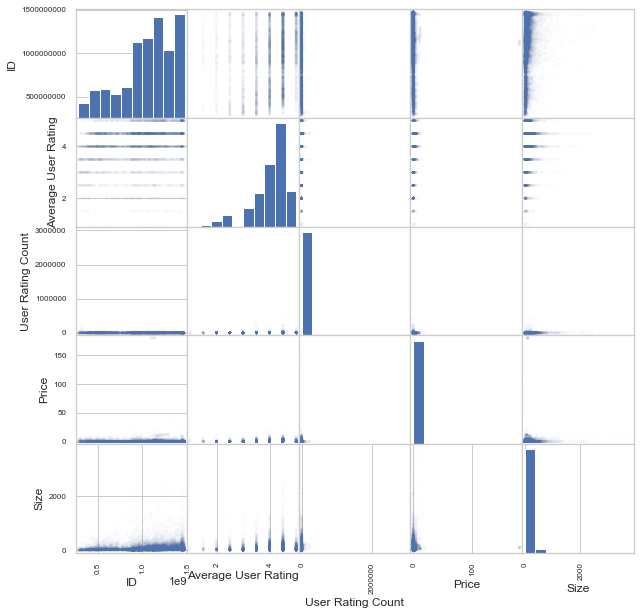

In [0]:

from pandas.plotting import scatter_matrix
scatter_matrix(game_data, alpha = .01, figsize = (10, 10))
pass

In [0]:
game_data.corr()

,ID,Average User Rating,User Rating Count,Price,Size
ID,1.000000,0.210280,-0.033052,-0.004187,0.143711
Average User Rating,0.210280,1.000000,0.033025,-0.000414,0.061617
User Rating Count,-0.033052,0.033025,1.000000,-0.011149,0.037736
Price,-0.004187,-0.000414,-0.011149,1.000000,0.033502
Size,0.143711,0.061617,0.037736,0.033502,1.000000


Коэффициэнты корреляции для числовых данных в диапазоне от -0.033 до 0.2, что говорит о том, что данные имеют слабые связи




In [0]:
categorical_cols=[x for x in game_data.columns if game_data[x].dtype=='object']
game_data[categorical_cols].describe()  # для категориальных


,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,TV Chess,Emoji Stickers,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,14,2,943,17,123,11806,12467,16286,778,75,118


Выглядит немного странно, что не все название игр уникальны, возможно таблица содержит повторения.

In [0]:
game_data.Name.nunique()==game_data.ID.nunique()

True

Как мы можем заметить, дубликаты имеют полностью одинаковые значения по всем столбцам, поэтому мы можем просто удалить их без опасения потери данных

In [0]:
game_data[game_data.Name.duplicated(False)]



,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
15,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",117.136719,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
16,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",117.136719,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
56,302532668,Shogi Kifu,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",28.416992,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
57,302532668,Shogi Kifu,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",28.416992,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
123,321026028,Checkers,Checkers (Draughts) & puzzles.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,36581.0,0.00,NaN,"Checkers (also called ""Draughts"") is challengi...",Vintolo Ltd,4+,EN,66.178711,Games,"Games, Entertainment, Board, Strategy",4/07/2009,14/06/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16513,1460730256,Fire Boy - Water Girl,"Run, jump & hop on platforms",https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Start your island world adventure with the cra...,GUENNOUNI Othmane,4+,EN,163.188477,Games,"Games, Adventure, Strategy, Entertainment",26/04/2019,29/06/2019
16560,1462595486,Kiloton,Intelligence Learning Lab,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""KILOTON is a logic puzzle game, in the vein o...",V. Kevin Russ,4+,EN,76.633789,Games,"Games, Strategy, Puzzle",10/05/2019,20/05/2019
16561,1462595486,Kiloton,Intelligence Learning Lab,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""KILOTON is a logic puzzle game, in the vein o...",V. Kevin Russ,4+,EN,76.633789,Games,"Games, Strategy, Puzzle",10/05/2019,20/05/2019
16564,1462678041,Idle Bomber - Idle & Clicker,Boom Boom Boom,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,1.99,Boom! Boom! Boom!\n\nIdle Bomber - Idle & Clic...,Rafael Sian de Freitas,4+,EN,108.078125,Games,"Games, Strategy, Casual",8/05/2019,15/06/2019


In [0]:
game_data.drop_duplicates(subset="Name", inplace=True)

Рассмотрим распределение игр по производителю 

In [0]:
game_data.groupby(['Developer']).ID.count().nlargest(30)

Developer
Tapps Tecnologia da Informa\xe7\xe3o Ltda.    121
Vikash Patel                                  105
Netsummit Marketing, Inc.                      94
GabySoft                                       85
NetSummit Enterprises, Inc.                    77
Andrew Kudrin                                  62
MmpApps Corp.                                  61
Domyung Kim                                    57
Amy Prizer                                     46
Detention Apps                                 41
Qumaron                                        41
Gulfam Asghar                                  38
Anthony Hindle                                 37
HexWar Games Ltd                               37
Lazy Days, LLC                                 37
EASY Inc.                                      35
M&M App Services Pty Ltd                       35
Renato Erive                                   35
Tayga Games OOO                                35
Asfia sultana                           

# Визуализация данных

83.60% игр являются бесплатными.
7,615 (45.20%) игр имеют внутренние покупки.


Text(0.5, 1.0, 'Распределение стоимости игр')

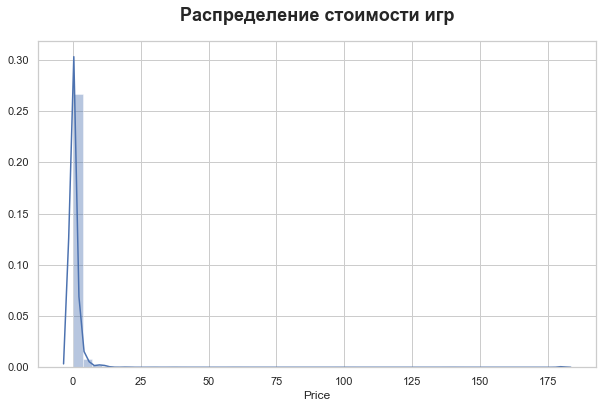

In [0]:
print('{:.2f}% игр являются бесплатными.'.format(game_data[game_data.Price==0].Price.count()/len(game_data)*100))
print('{:,} ({:.2f}%) игр имеют внутренние покупки.'.format(game_data['In-app Purchases'].notna().sum(),
                                                                  game_data['In-app Purchases'].notna().sum()/len(game_data)*100))

plt.figure(figsize=(10,6))
sns.distplot(game_data.Price.dropna())
plt.title('Распределение стоимости игр', fontweight='bold',fontsize=18, pad=20)

Существует очень слабая отрицательная корреляция между стоимостью игры и ее рейтингом, что подразумевает, что более дорогие игры получат более низкие рейтинги. Но в тоже время, много различных значений и выбросов, которые противоречат этому.

Большинство игр являются бесплатными, в тоже время чуть менее половины игр требуют внутриигровых денежных вложений. При этом разброс по стоимости довольно широк.

Text(0.5, 1.0, 'Отношение между ценой и средней оценкой пользователей')

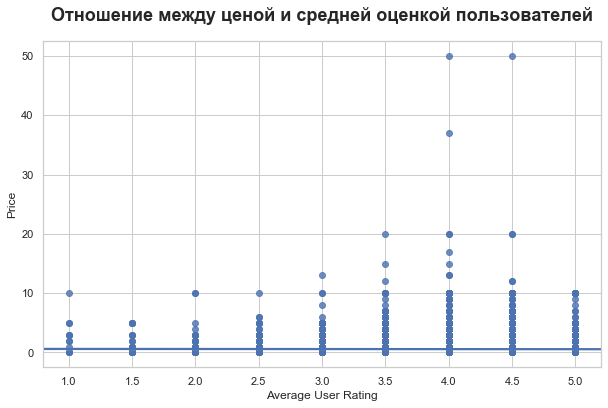

In [0]:
plt.figure(figsize=(10,6))
sns.regplot(x=game_data['Average User Rating'], y=game_data.Price.clip(0,50))
plt.title('Отношение между ценой и средней оценкой пользователей', fontweight='bold',fontsize=18, pad=20)


Игра с самым большим размером < Chess Raiders > - 3,820.03MB, Самая маленькая игра < "Sally's Spa HD" > - 0.05MB


Text(0.5, 1.0, 'Отношение размера игры и средней оценки пользователя')

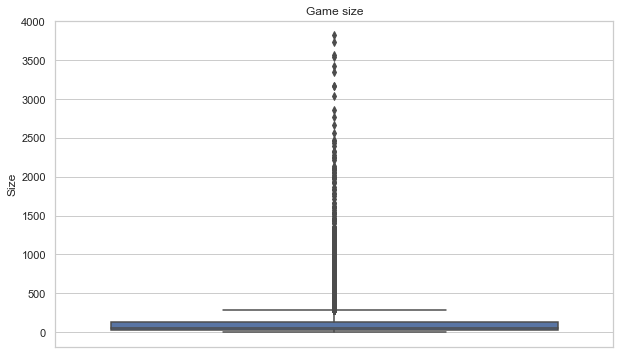

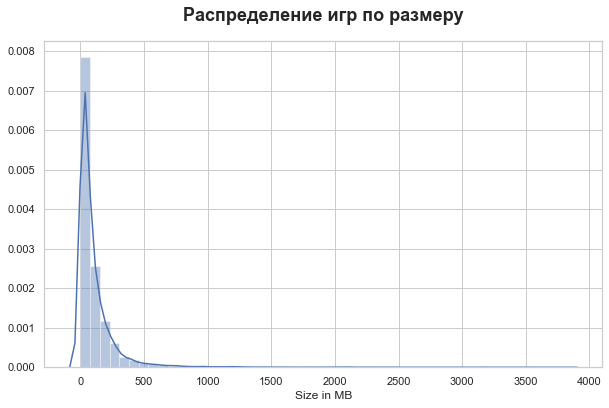

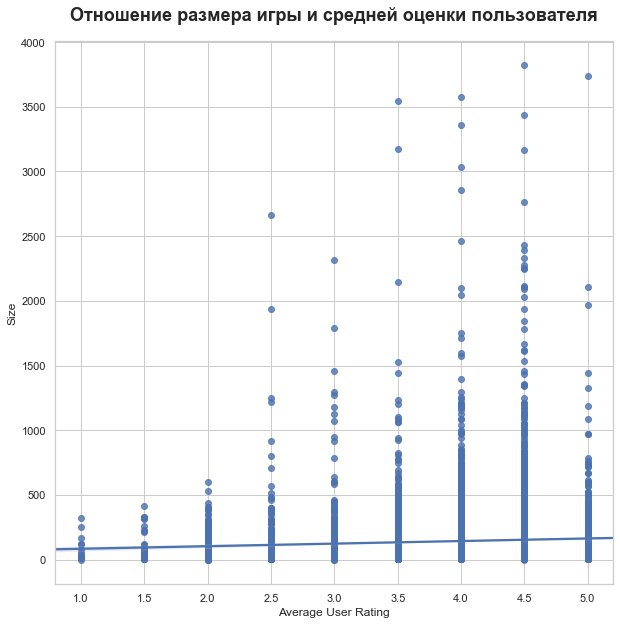

In [0]:
print('Игра с самым большим размером < {} > - {:,.2f}MB, Самая маленькая игра < {} > - {:.2f}MB'.format(game_data.Name.iloc[game_data.Size.idxmax()], game_data.Size.max(), game_data.Name.iloc[game_data.Size.idxmin()], game_data.Size.min()))
plt.figure(figsize=(10,6))
sns.boxplot(y=game_data.Size)
plt.title('Game size')

plt.figure(figsize=(10,6))
sns.distplot(game_data.Size.dropna())
plt.title('Распределение игр по размеру', fontweight='bold',fontsize=18, pad=20)
plt.xlabel('Size in MB')

plt.figure(figsize=(10,10))
sns.regplot(x=game_data['Average User Rating'],y=game_data['Size'])
plt.title('Отношение размера игры и средней оценки пользователя', fontweight='bold',fontsize=18, pad=20)

Кажется, между этими двумя показателями существует положительная корреляция: учитывая масштаб, более крупные игры, вероятно, будут давать более высокие рейтинги. Но она довольно слаба, так как большинство значений находятся далеко от линии регрессии, а игры почти всех размеров имеют рейтинг 4,5.

4+     11693
9+      2459
12+     2034
17+      661
Name: Age Rating, dtype: int64


Text(0.5, 1.0, 'Соотношение количества игр и возрастных ограничений')

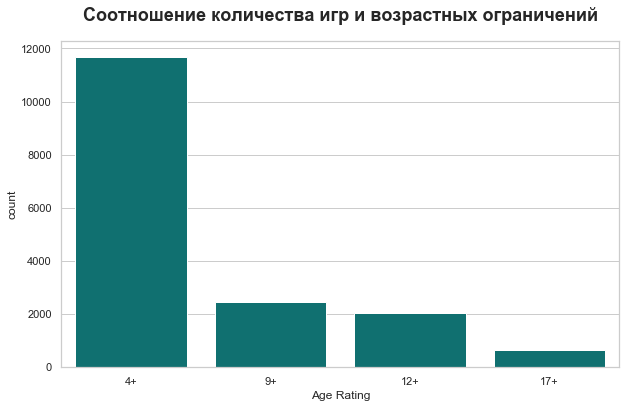

In [0]:
plt.figure(figsize=(10,6))
print(game_data['Age Rating'].value_counts())
sns.countplot(game_data['Age Rating'], color='teal')
plt.title('Соотношение количества игр и возрастных ограничений', fontweight='bold',fontsize=18, pad=20)

В большинство игр могут играть дети, которые чаще всего и выбирают данный вид времяпрепровождения.
В тоже время это свидетельствует об увеличении целевой аудитории при снижении возростных рейтингов.

Количество поддержки различных языков: 115
EN    16676
ZH     4945
DE     2576
FR     2503
ES     2399
      ...  
GV        1
MI        1
FO        1
IU        1
JV        1
Length: 115, dtype: int64


Text(0.5, 1.0, 'Количество игр поддерживающих каждый язык')

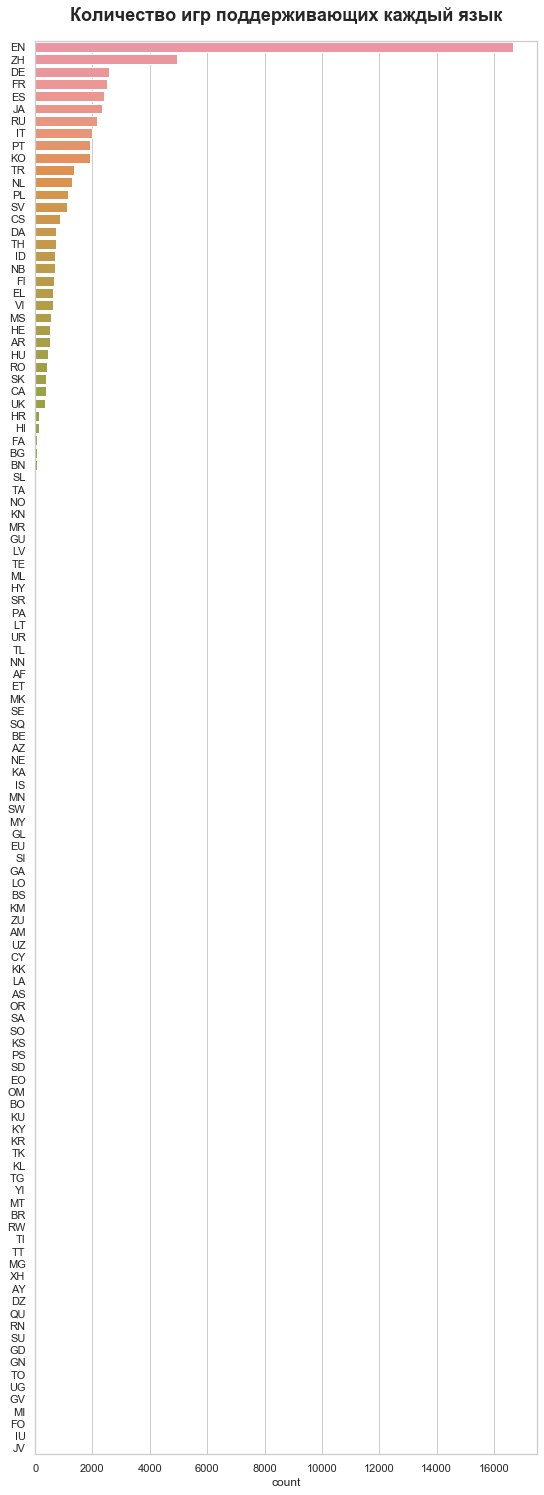

In [0]:
language_list=' '.join([x for x in game_data.Languages.dropna().values]).replace(',','').split()
languages=pd.Series(language_list)
print('Количество поддержки различных языков: {}'.format(languages.nunique()))
print(languages.value_counts())
plt.figure(figsize=(9,26))
sns.countplot(y=languages, order=languages.value_counts().index)
plt.title('Количество игр поддерживающих каждый язык', fontweight='bold',fontsize=18, pad=20)


Для многих пользователей это может стать критичным, если игра не поддерживает его родной язык (особенно, если учесть, данные с предыдущего графика о возрастных ограничениях, маленькие дети вряд ли владеют иностранным языком). Как мы можем заметить, чаще всего игры поддерживают английский, китайский, французский, испанский, немецкий и русский языки, как самые распространенные. При этом, например, на язык [курдов](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D1%80%D0%B4%D1%8B) переведена только одна игра. 

Text(0, 0.5, 'Count')

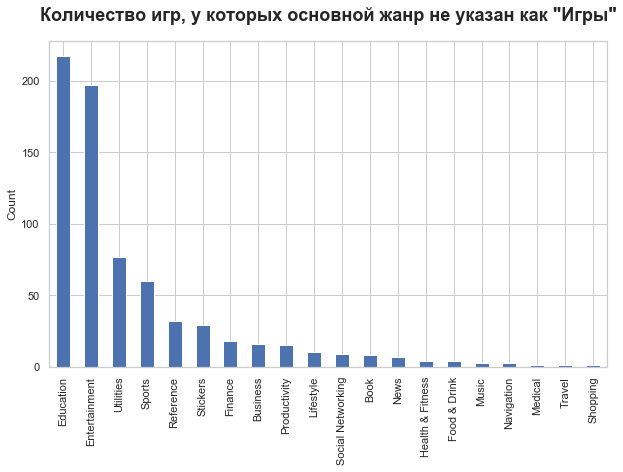

In [0]:
plt.figure(figsize=(10,6))
game_data[game_data['Primary Genre'] != 'Games']['Primary Genre'].value_counts().plot(kind='bar')
plt.title('Количество игр, у которых основной жанр не указан как "Игры"', fontweight='bold',fontsize=18, pad=20)
plt.ylabel('Count')

4.5    2832
4.0    1707
5.0     984
3.5     916
3.0     507
2.5     313
2.0     157
1.5      59
1.0      13
Name: Average User Rating, dtype: int64


Text(0.5, 1.0, 'Средний рейтинг')

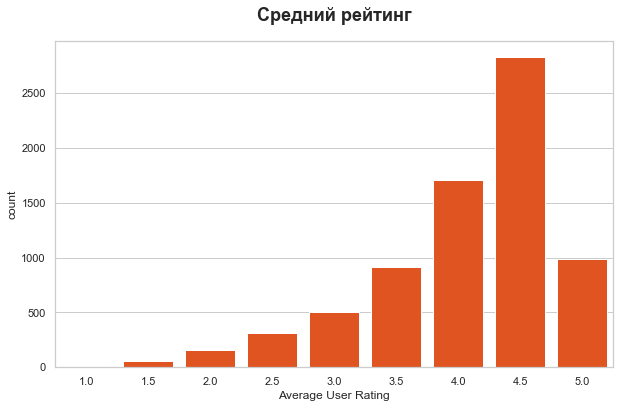

In [0]:
plt.figure(figsize=(10,6))
print(game_data['Average User Rating'].value_counts())
sns.countplot(game_data['Average User Rating'], color='orangered')
plt.title('Средний рейтинг', fontweight='bold',fontsize=18, pad=20)

Text(0.5, 1.0, 'Соотношение средней оценки пользователя и их количества')

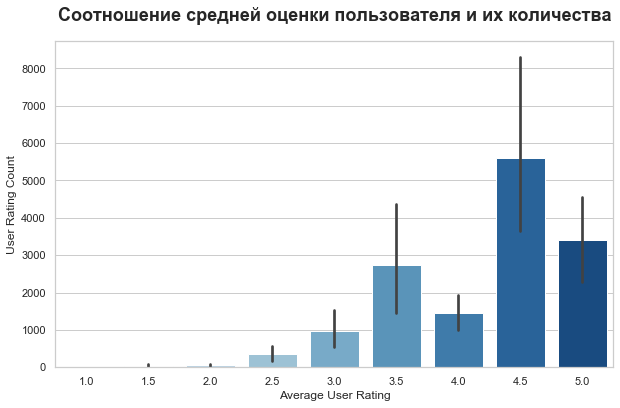

In [0]:
plt.figure(figsize=(10,6))
ratings=game_data[['Average User Rating','User Rating Count']].dropna()
sns.barplot(x=ratings['Average User Rating'], y=ratings['User Rating Count'], palette='Blues')
plt.title('Соотношение средней оценки пользователя и их количества', fontweight='bold',fontsize=18, pad=20)


Иконки игр с низким рейтингом

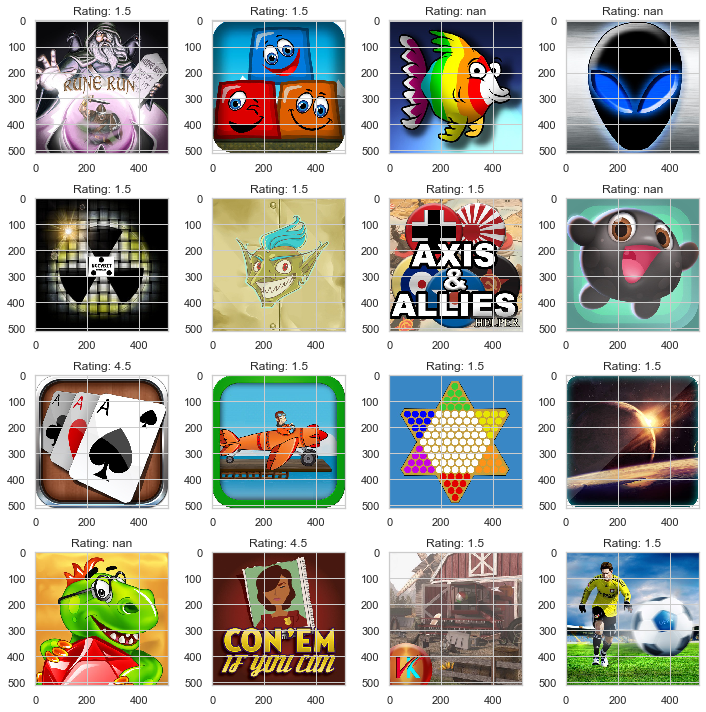

In [0]:
n = 4

fig, axs = plt.subplots(n, n, figsize= (10, 10), facecolor='white')

for i in range(0, n):
    for j in range(0, n):
        if abs(i - j) < 2:
            random_test_df = game_data[game_data['Average User Rating'] < 2]
            random_test_number = random_test_df.sample().reset_index()['index'][0]
        else:
            random_test_number = random.randint(0, len(game_data))
    
        display_url = game_data.loc[random_test_number, 'Icon URL']
        display_rating = game_data.loc[random_test_number, 'Average User Rating']

        res = requests.get(display_url)
        display_imm_arr = imageio.imread(io.BytesIO(res.content))
        axs[i][j].imshow(display_imm_arr, interpolation='nearest')
        axs[i][j].set_title(f"Rating: {display_rating}")
        
fig.tight_layout()
plt.show()


# Заполнение пропущенных значений и обработка категориальных признаков
* Price - т.к. большинство игр являются бесплатными, заполним недостающие значения 0.
* Size - заполним единственное недостающее значение медианой
* In-app Purchases - я думаю, что данные не указаны, потому что покупки в играх не предусмотрены. На мой взгляд данный признак не является важным в виде числовых значений, куда более важен сам факт необходимости что-то покупать в игре. Заменим ее на бинарный признак.
* Subtitle - аналогично In-app Purchases
* Age Rating, Primary Ganre - заменим с помощью dummy значений
* Ganres - содержит дуплицирующую информацию из поля Primary Ganre, не будем учитывать
* Developer - т.к. данный столбец имеет большое количество уникальных значений, то векторизация данного столбца не принесет нам большого успеха. Присвоим каждому разработчику игр уникальный ID.
* Description - тема для большого отдельного исследования, сегодня останется за рамками задачи
* Original Release Date и Current Version Release Date - не войдут в исследование
* Name, ID - эквивалентные данные, оставим только числовое.

In [4]:
prices = game_data['Price'].fillna(0)
sizes = game_data['Size'].fillna(game_data.Price.median())
purchases = game_data['In-app Purchases'].fillna('0')
game_data['has In-app Purchases'] = 0
game_data.at[purchases != '0', 'has In-app Purchases'] = 1
game_data['has In-app Purchases'].describe()


count    17007.000000
mean         0.450932
std          0.497601
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has In-app Purchases, dtype: float64

In [0]:
game_data.at[~game_data['Subtitle'].isnull(), 'Subtitle'] = 1
game_data.at[game_data['Subtitle'].isnull(), 'Subtitle'] = 0



In [0]:
age_ratings = pd.get_dummies(game_data['Age Rating'])
ganres = pd.get_dummies(game_data['Primary Genre'])

In [0]:
unique_developers = game_data.Developer.unique()
for idx, developer in enumerate(unique_developers):
  game_data.at[game_data['Developer'] == developer, 'Developer'] = idx
  

Нормализуем количественные значения

In [0]:
sizes = (sizes - sizes.mean(axis=0)) / sizes.std(axis=0)

In [0]:
prices = (prices - prices.mean(axis=0)) / prices.std(axis=0)

In [10]:
rc = game_data['User Rating Count'].fillna(0)
rc = (rc - rc.mean(axis=0)) / rc.std(axis=0)

rc.describe()

count    1.700700e+04
mean    -2.207768e-15
std      1.000000e+00
min     -5.200647e-02
25%     -5.200647e-02
50%     -5.200647e-02
75%     -5.090975e-02
max      1.072400e+02
Name: User Rating Count, dtype: float64

Соберем все данные вместе

In [11]:
X = game_data[['ID','Developer','has In-app Purchases', 'Subtitle']]
X = pd.concat((X, sizes, prices, age_ratings, ganres, rc), axis=1)
X



,ID,Developer,has In-app Purchases,Subtitle,Size,Price,12+,17+,4+,9+,Book,Business,Education,Entertainment,Finance,Food & Drink,Games,Health & Fitness,Lifestyle,Medical,Music,Navigation,News,Productivity,Reference,Shopping,Social Networking,Sports,Stickers,Travel,Utilities,User Rating Count
0,284921427,0,0,0,-0.490298,0.278117,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073692
1,284926400,1,0,0,-0.507606,0.150407,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.041959
2,284946595,2,0,0,-0.564834,-0.103735,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.244320
3,285755462,0,0,0,-0.462315,-0.103735,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.683752
4,285831220,3,0,0,-0.397806,0.278117,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.051016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,1474626442,8687,0,1,-0.249966,-0.103735,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.052006
17003,1474919257,8689,0,0,-0.026313,-0.103735,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.052006
17004,1474962324,8690,0,0,-0.454184,-0.103735,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.052006
17005,1474963671,8691,1,1,0.398003,-0.103735,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.052006


Разделение выборки на тренировочную и тестовую

In [0]:
feature_names = X.columns
X = X.to_numpy()

In [13]:
y = np.array(game_data['Average User Rating'].fillna(0))
y = y.astype(int)# для приведения к номерам классов
y


array([4, 3, 3, ..., 0, 0, 0])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

13605 3402


# Запуск модели

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.3986792312829265 55


Согласно данным подбора параметров, собранных с помощью кросс-валидации на 5 сабсетах, самым подходящим является классификатор с 55 соседями. Воспользуемся им для получения предсказания на тренировочной и тестовой выборках

In [0]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.39177858573866586 0.38991097922848666


Оценка на тренировочной выборке примерно равны. При этом риск ошибки довольно высок. Это говорит о том, что наши данные плохо сбалансированы. Будем использовать данный классификатор в качестве baseline для других классификаторов.

In [0]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.000445202938339393 0.43827893175074184


In [0]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.1712166172106825


In [0]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in indices:
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[int(f)], importances[int(f)]))

Feature ranking:
32. feature 'User Rating Count' (0.562238)
 1. feature '   ID' (0.125682)
 2. feature 'Developer' (0.117508)
 5. feature ' Size' (0.108094)
 3. feature 'has In-app Purchases' (0.026052)
 6. feature 'Price' (0.018535)
 4. feature 'Subtitle' (0.011583)
 9. feature '   4+' (0.009098)
 7. feature '  12+' (0.005775)
10. feature '   9+' (0.004346)
17. feature 'Games' (0.002680)
 8. feature '  17+' (0.002349)
14. feature 'Entertainment' (0.001733)
13. feature 'Education' (0.000924)
31. feature 'Utilities' (0.000765)
25. feature 'Reference' (0.000673)
28. feature 'Sports' (0.000583)
24. feature 'Productivity' (0.000347)
19. feature 'Lifestyle' (0.000187)
12. feature 'Business' (0.000132)
15. feature 'Finance' (0.000126)
21. feature 'Music' (0.000114)
27. feature 'Social Networking' (0.000102)
11. feature ' Book' (0.000077)
29. feature 'Stickers' (0.000071)
23. feature ' News' (0.000069)
26. feature 'Shopping' (0.000043)
30. feature 'Travel' (0.000035)
20. feature 'Medical' (0.

In [0]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.23531157270029673


In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
err_train = np.mean(y_train != dtc.predict(X_train))
err_test  = np.mean(y_test  != dtc.predict(X_test))

print(err_train, err_test)

0.0 0.2172106824925816


In [0]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.3823551235438154 0.38160237388724033


In [0]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0424426801216888 0.17299703264094957


Как мы видим, лучше всего с данной задачей справиляется случайные лес за счет объединения классификаторов в ансамбль и принятия решения с помощью голосования. Метод опорных векторов переобучился на тренировочных данных и поэтому мы видим настолько большую разницу между тренировочной и тестовой выборкой, это также вызвано несбалансированностью выборки.

# Выделение главных компонент

In [0]:
print("Колличество признаков {}".format(len(feature_names)))

Колличество признаков 32


Количество признаков в наших данных - 32, что говорит о том, что данные представлены в виде 32-хмерного пространства. Слишком большая размерность пространства признаков может являться причиной медленной работы алгоритма. В этом случае для ускорения работы алгоритма принято понижать размерность данных. Для понижения размерности будем использовать метод главных компонент.Проследим, как изменится результат работы алгоритма с сокращением размерности пространства признаков до двухмерного.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_сomponents = pca.fit_transform(X)

In [67]:
principal_df = pd.DataFrame(data = principal_сomponents, columns = ['principal component 1', 'principal component 2'])
principal_df.head(10)

,principal component 1,principal component 2
0,7.746924e+08,-1682.501467
1,7.746874e+08,-1683.467451
2,7.746672e+08,-1684.329310
3,7.738584e+08,-1676.796092
4,7.737826e+08,-1679.277833
5,7.734038e+08,-1677.686637
6,7.733000e+08,-1677.976854
7,7.732499e+08,-1678.633520
8,7.730468e+08,-1678.244677
9,7.729311e+08,-1678.453262


Так выглядят 2-мерная проекция наших данных. Еще один недостаток многомерных данных - сложность визуализации. Теперь когда мы имеем 2D данные мы можем их визуализировать без каких-либо проблем.

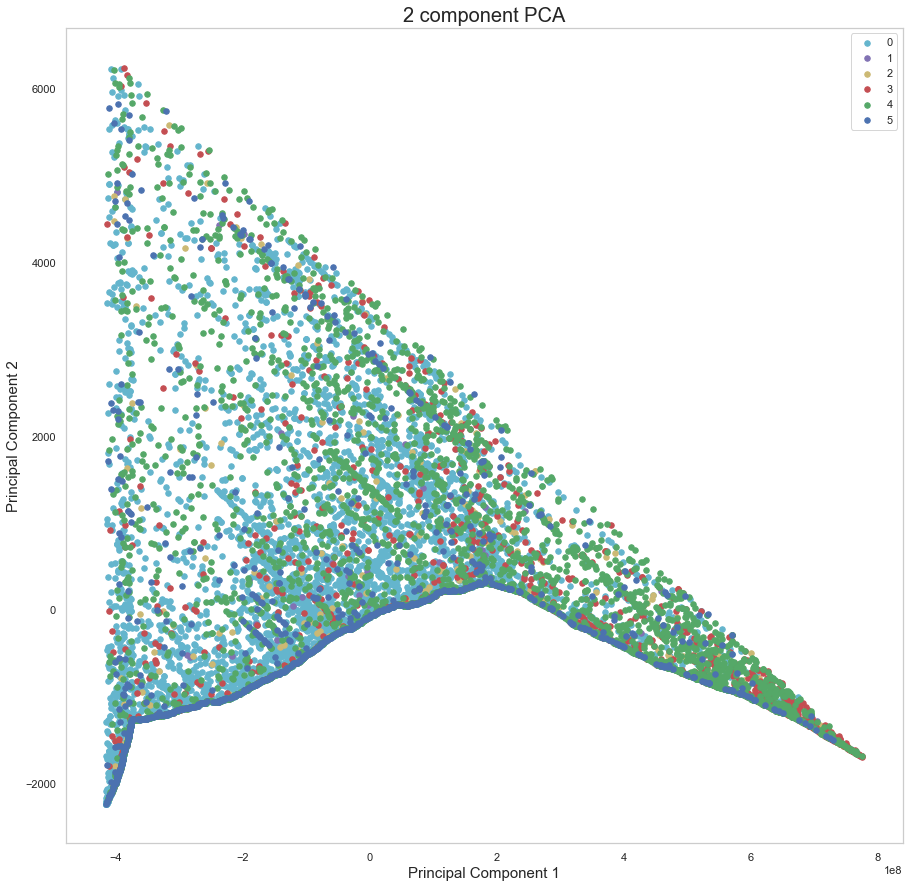

In [0]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(6)
colors = ['c', 'm', 'y', 'r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(principal_df.loc[indicesToKeep, 'principal component 1'], 
               principal_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()

Данные распложены близко к друг другу, практически неотделимы, что может говорить о недостаточном количстве размерности выборки для представления данных.

### Доли объясненной дисперсии для каждой из компонент

In [0]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = ['principal_component_1', 'principal_component_2']
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('Суммарная доля информации: {}%'.format(sum(explained_variance_ratio) * 100))

principal_component_1: 99.99999999795143%
principal_component_2: 2.0485124766413666e-09%
Суммарная доля информации: 99.99999999999996%


Объясненная дисперсия говорит о том, сколько информации (дисперсии) можно отнести к каждому из основных компонентов. Это важно, поскольку во время конвертиртации 32х-мерное пространство в 2-мерное пространство, мы теряем некоторую дисперсию (информацию) при этом. Как мы можем наблюдать, наша суммарная потеря информации близка к нулю и составляет мнее десятитысячной доли процента, поэтому потери данных можно не опасаться. В то же время доля первой главной компоненты составляет более 99%, а второй абсолютно незначительна на ее фоне, менее 1%. Это говорит о том, что мы несильно проиграем, если будем использовать только перую компоненту.

### Влияние на работу классификатора

Применим метод главных компонент к нашей тестовой и тренировочной выборкам, измерим тренировочную и тестовую ошибку классификатора обученного на таких данных.

In [0]:
X_2d_train = pca.transform(X_train)
X_2d_test = pca.transform(X_test)

Наилучшим образом на наших данных себя показал алгоритм RandomForset. Для начала исследуем как изменится его тренировочная и тестовая ошибки.

#### Random Forest

In [0]:
print("До применения метода главных компонент")
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
rf.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != rf.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != rf.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))


До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.0
Ошибка на тестовой выборке: 0.17091988130563798
После
Ошибка на тренировочной выбрке: 0.0
Ошибка на тестовой выборке: 0.46439169139465875


Ошибка на тестовой выборке возросла в несколько раз, что свидетельствует, что RandomForest - плохой пример для понижения размерности. Он использует много слабых классификаторов, ответы которых взвешиваются и усредняются. В итоге, при понижении размерности, увеличивается ошибка каждого классификатора и сильно страдает их общая ошибка. 

Проверим еще несколько классификаторов

#### Extrimely Randomized Trees

In [0]:
print("До применения метода главных компонент")
ert.fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
ert.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != ert.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != ert.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.0
Ошибка на тестовой выборке: 0.23620178041543027
После
Ошибка на тренировочной выбрке: 0.0
Ошибка на тестовой выборке: 0.4887240356083086


#### AdaBoost

In [0]:
print("До применения метода главных компонент")
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test  = np.mean(y_test  != ada.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
ada.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != ada.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != ada.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.38116791570824365
Ошибка на тестовой выборке: 0.37863501483679524
После
Ошибка на тренировочной выбрке: 0.41871336350819915
Ошибка на тестовой выборке: 0.4086053412462908


#### Decision Tree

In [0]:
print("До применения метода главных компонент")
dtc.fit(X_train, y_train)

err_train = np.mean(y_train != dtc.predict(X_train))
err_test  = np.mean(y_test  != dtc.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
dtc.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != dtc.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != dtc.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.0
Ошибка на тестовой выборке: 0.21602373887240356
После
Ошибка на тренировочной выбрке: 0.0
Ошибка на тестовой выборке: 0.5240356083086053


#### SVM

In [0]:
print("До применения метода главных компонент")
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
svc.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != svc.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != svc.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.000445202938339393
Ошибка на тестовой выборке: 0.43827893175074184
После
Ошибка на тренировочной выбрке: 0.0
Ошибка на тестовой выборке: 0.43827893175074184


#### KNN

In [0]:
print("До применения метода главных компонент")
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
knn.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != knn.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != knn.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.39177858573866586
Ошибка на тестовой выборке: 0.38991097922848666
После
Ошибка на тренировочной выбрке: 0.39177858573866586
Ошибка на тестовой выборке: 0.38991097922848666


#### Gradient Boosting

In [0]:
print("До применения метода главных компонент")
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
gbt.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != gbt.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != gbt.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.0424426801216888
Ошибка на тестовой выборке: 0.17240356083086053
После
Ошибка на тренировочной выбрке: 0.23506715144319953
Ошибка на тестовой выборке: 0.42789317507418395


Как мы видим, ошибки KNN и SVM остались практически неизменными после понижения размерности пространства признаков. В то время как у Decision Tree, Random Forest, Extrimely Randomized Trees, Gradient Boosting,  ошибка сильно увеличилась (чем меньше признаков, тем меньше максимально возможная глубина деревьев и сложнее понять закономерности в данных, поэтому древовидные представления моделей переобучаются на тренировочных данных и теряют обощающую способность). Результаты AdaBoost также стали хуже на несколько процентов, что скорее всего связано с увеличением ошибки слабых классификаторов, входящих в бустинг.

## Зависимость между размерностью пространства признаков и результатами классификатора.

In [0]:


def run_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    err_train = np.mean(y_train != classifier.predict(x_train))
    err_test  = np.mean(y_test  != classifier.predict(x_test))
    return err_train, err_test

def select_components(classifier):
    n_components = range(2, 32)
    train_err = []
    test_err = []
    for n in n_components:
        pca = PCA(n_components=n)
        pca.fit(X)
        X_nd_train = pca.transform(X_train)
        X_nd_test = pca.transform(X_test)
        trn_e, tst_e = run_classifier(classifier, X_nd_train, y_train, X_nd_test, y_test)
        train_err.append(trn_e)
        test_err.append(tst_e)
    return test_err, train_err


Наименьшая ошибка на тестовой выборке 0.38991097922848666 с 2 компонент
Наибольшая ошибка на тестовой выборке 0.38991097922848666 с 2 компонент
Наименьшая ошибка на тренировочной выборке 0.39177858573866586 с 2 компонент
Наибольшая ошибка на тренировочной выборке 0.39177858573866586 с 2 компонент


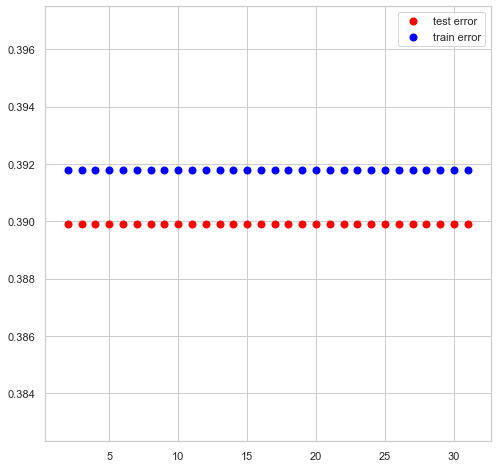

In [0]:
test_err, train_err = select_components(knn)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['red', 'blue']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Наименьшая ошибка на тестовой выборке {} с {} компонент".format(test_err[best_test_result], best_test_result + 2))
print("Наибольшая ошибка на тестовой выборке {} с {} компонент".format(test_err[worst_test_result], worst_test_result + 2))
print("Наименьшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[best_train_result], best_train_result + 2))
print("Наибольшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[worst_train_result], worst_train_result + 2))

Равенство наименьшей и наибольшей ошибки KNN говорит о том, что ошибка не меняется при любом количестве главных компонент.

Наименьшая ошибка на тестовой выборке 0.4379821958456973 с 25 компонент
Наибольшая ошибка на тестовой выборке 0.43827893175074184 с 2 компонент
Наименьшая ошибка на тренировочной выборке 0.0 с 2 компонент
Наибольшая ошибка на тренировочной выборке 0.00037100244861616087 с 26 компонент


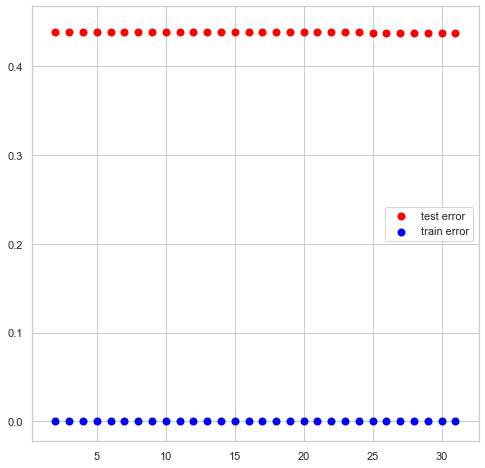

In [0]:
test_err, train_err = select_components(svc)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['red', 'blue']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Наименьшая ошибка на тестовой выборке {} с {} компонент".format(test_err[best_test_result], best_test_result + 2))
print("Наибольшая ошибка на тестовой выборке {} с {} компонент".format(test_err[worst_test_result], worst_test_result + 2))
print("Наименьшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[best_train_result], best_train_result + 2))
print("Наибольшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[worst_train_result], worst_train_result + 2))

Наименьшая ошибка на тестовой выборке 0.4367952522255193 с 25 компонент
Наибольшая ошибка на тестовой выборке 0.5252225519287834 с 2 компонент
Наименьшая ошибка на тренировочной выборке 0.0 с 2 компонент
Наибольшая ошибка на тренировочной выборке 0.0 с 2 компонент


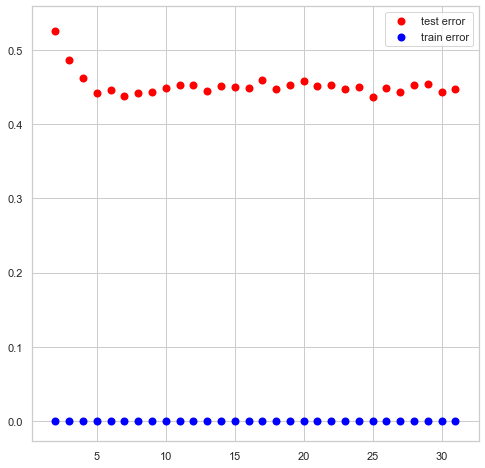

In [0]:
test_err, train_err = select_components(dtc)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['red', 'blue']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Наименьшая ошибка на тестовой выборке {} с {} компонент".format(test_err[best_test_result], best_test_result + 2))
print("Наибольшая ошибка на тестовой выборке {} с {} компонент".format(test_err[worst_test_result], worst_test_result + 2))
print("Наименьшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[best_train_result], best_train_result + 2))
print("Наибольшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[worst_train_result], worst_train_result + 2))

Наименьшая ошибка на тестовой выборке 0.33501483679525224 с 10 компонент
Наибольшая ошибка на тестовой выборке 0.4652818991097923 с 2 компонент
Наименьшая ошибка на тренировочной выборке 0.0 с 2 компонент
Наибольшая ошибка на тренировочной выборке 0.0 с 2 компонент


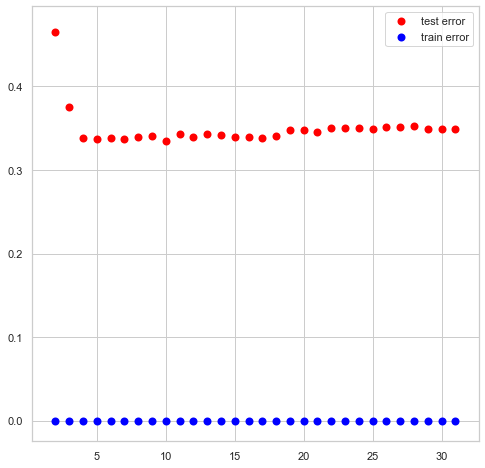

In [0]:
test_err, train_err = select_components(rf)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['red', 'blue']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Наименьшая ошибка на тестовой выборке {} с {} компонент".format(test_err[best_test_result], best_test_result + 2))
print("Наибольшая ошибка на тестовой выборке {} с {} компонент".format(test_err[worst_test_result], worst_test_result + 2))
print("Наименьшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[best_train_result], best_train_result + 2))
print("Наибольшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[worst_train_result], worst_train_result + 2))

Для KNN - ошибка осталась неизменной при различном количестве главных компонент. SVM - ошибка уменьшилась на 0.0002 при 25 главных компонентах по сравнению с полноразменой выборкой, но о природе данного улучшения сложно судить т.к. модель переобучена на тренировочных данных. Для Random Forest и Decision Tree тестовые ошибки сильно колеблются, но остаются сильно выше, чем результаты показанные на полных данных.

# MLP

## Обучаем однослойный классификатор

Рассмотрим Multi Layer Perceptron Classifier из sklearn. В качестве функции активации будем использовать sigmoid, а в качестве оптимайзера - lbfgs. Для начала обучим классификатор, состоящий из одного слоя с 100 нейронами.

In [15]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=144, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


## Проверяем качество классификатора

посчитаем ошибку на тестовой и тренировочной выборках

In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [17]:
print('Train error: {}'.format(1- mlp_model.score(X_train, y_train)))
print('Test error: {}'.format(1 - mlp_model.score(X_test, y_test)))


Train error: 0.4441749356854098
Test error: 0.44620811287477957


Рассмотрим более эфективные метрики качества классификации


In [18]:
from sklearn.metrics import classification_report
print('Метрики для тренировочной выборки')
print(classification_report(y_train, y_train_pred))
print('\nМетрики для тестовой выборки')
print(classification_report(y_test, y_test_pred))

Метрики для тренировочной выборки
              precision    recall  f1-score   support

           0       0.56      1.00      0.71      7562
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       365
           3       0.00      0.00      0.00      1162
           4       0.00      0.00      0.00      3657
           5       0.00      0.00      0.00       802

    accuracy                           0.56     13605
   macro avg       0.09      0.17      0.12     13605
weighted avg       0.31      0.56      0.40     13605


Метрики для тестовой выборки
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1884
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00       277
           4       0.00      0.00      0.00       926
           5       0.00      0.00      0.00       188

    accuracy 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


В отчете представлены значения метрик для каждого класса. Как видно из представленных таблиц, наш классификатор принял решение, что все объекты принадрежат одному классу. В первую очередь, это может быть вызвано несбалансированностью наших данных, неподходящими гиперпараметрами классификатора и недообучением. Рассмотрим матрицу рассогласования, чтобы понять природу ошибок

In [0]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test_pred, y_test)
cm_train = confusion_matrix(y_train_pred, y_train)

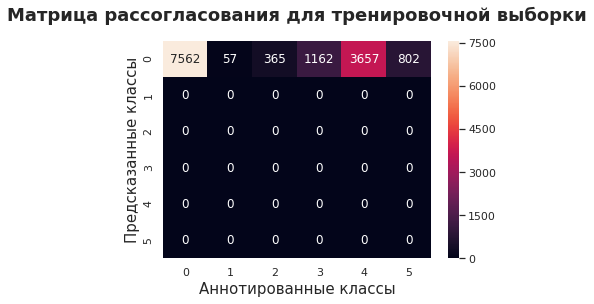

In [27]:
sns.heatmap(cm_train, annot=True, fmt="d")
plt.title('Матрица рассогласования для тренировочной выборки', fontweight='bold',fontsize=18, pad=20)
plt.xlabel('Аннотированные классы', fontsize = 15)
plt.ylabel('Предсказанные классы', fontsize = 15)
pass



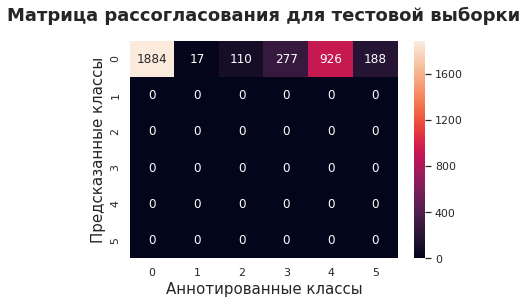

In [28]:
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title('Матрица рассогласования для тестовой выборки', fontweight='bold',fontsize=18, pad=20)
plt.xlabel('Аннотированные классы', fontsize = 15)
plt.ylabel('Предсказанные классы', fontsize = 15)
pass

Матрица рассогласования подтверждает предположение, что все предсказанные объекты пренадлежат к классу 0.

## Двуслойный классификатор

Попробуем исправить ситуацию с помощью добавления еще одного слоя.

In [29]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 100),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Train error: {}'.format(1- mlp_model.score(X_train, y_train)))
print('Test error: {}'.format(1 - mlp_model.score(X_test, y_test)))

Train error: 0.4441749356854098
Test error: 0.44620811287477957


Значение ошибки на тренировочной и тестовой выборках не изменилось, а значит одного слоя вполне достаточно для наших экспериментов на данном этапе.

## Подбор гиперпараметров.
Подберем оптимальное значение параметра регуляризации alpha


In [0]:
alpha_arr = np.logspace(-3, 2, 21)
test_err, train_err = [], [] 
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 144)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

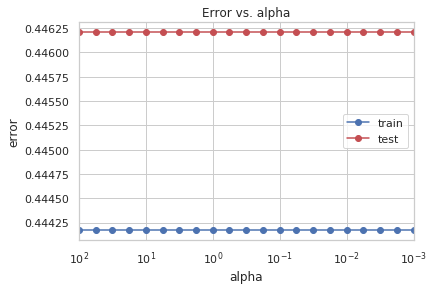

In [31]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Построенный график зависимости ошибки от alpha выглядит как 2 прямые, что говорит, что качество классификатора не меняется при изменении значения alpha, т.е. не зависит от него, а значит с текущей реализацией мы не сможем получить результат лучше.
Рассмотрим результы классификатора с оптимальным параметром alpha, чтобы убедиться, что это действительно так.

In [32]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
alpha_opt = alpha_arr[test_err == min_test_err][0]
print('Alpha optimum: {}'.format(alpha_opt))


Min train error: 0.4441749356854098
Min test error: 0.4462081128747795
Alpha optimum: 0.001


Ошибка та же, что и у изначального классификатора, alpha=0.001 - значение параметра по-умолчанию (согласно документации).

Проведем такой же эксперимент для 2-хслойной сети.

In [33]:
alpha_arr = np.logspace(-3, 2, 21)
test_err, train_err = [], [] 
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 144)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
alpha_opt = alpha_arr[test_err == min_test_err][0]
print('Alpha optimum: {}'.format(alpha_opt))


Min train error: 0.4441749356854098
Min test error: 0.4462081128747795
Alpha optimum: 0.001


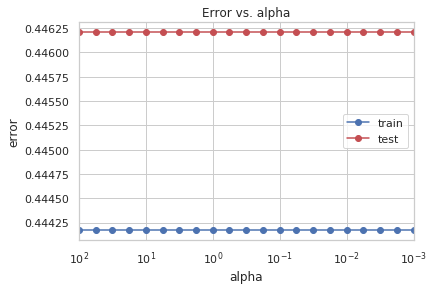

In [34]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Результат снова остался неизменен. Несбалансированность выборки оказывает сильное влияние на обучение модели, в результате чего модель обладает недостаточной чувствительностью к различиям в классах и выявлению закономерностей. Попробуем побороть данную проблему с помощью увеличения количества нейронов.

In [35]:
layer_sizes = [5, 10, 25, 50, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000]
test_err, train_err = [], [] 
for size in layer_sizes:
    mlp_model = MLPClassifier(hidden_layer_sizes = tuple([size]), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 144)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
opt_size_index = np.argmin(test_err)
print('size optimum: {}'.format(layer_sizes[opt_size_index]))

Min train error: 0.4441749356854098
Min test error: 0.4462081128747795
size optimum: 5


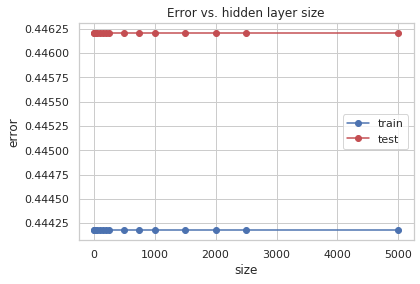

In [36]:
plt.plot(layer_sizes, train_err, 'b-o', label = 'train')
plt.plot(layer_sizes, test_err, 'r-o', label = 'test')
plt.title('Error vs. hidden layer size')
plt.xlabel('size')
plt.ylabel('error')
plt.legend()
pass

Ошибка также не изменилась с изменением количеством слоев. Это значит, либо это самый лучший результат, который мы можем достичь на данной модели, либо наша модель недообучена. Проверим, изменится ли ошибка с изменением тренировочных итераций. 

In [37]:
max_iters = np.arange(10, 1000, 10)
test_err, train_err = [], [] 
for max_iter in max_iters:
    mlp_model = MLPClassifier(hidden_layer_sizes = (5, ), 
                              solver = 'lbfgs', 
                              activation = 'logistic', 
                              random_state = 144,
                              max_iter=max_iter)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
opt_iter_index = np.argmin(test_err)
opt_iter = max_iters[opt_iter_index]
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
print('Iterations optimum: {}'.format(opt_iter))

Min train error: 0.4441749356854098
Min test error: 0.4462081128747795
Iterations optimum: 10


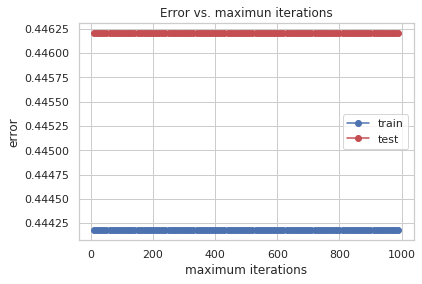

In [38]:
plt.plot(max_iters, train_err, 'b-o', label = 'train')
plt.plot(max_iters, test_err, 'r-o', label = 'test')
plt.title('Error vs. maximun iterations')
plt.xlabel('maximum iterations')
plt.ylabel('error')
plt.legend()
pass

Ошибка осталась прежней, что говорит, что это наилучший достигаемый результат. Значение функции потерь нашей модели достигает плато за малое количество итераций и далее не меняется.

Выбор оптимайзера и функции активации 

In [101]:
optimizers = ['lbfgs', 'sgd', 'adam']
activations = ['identity', 'logistic', 'tanh', 'relu']
results_train, result_test = np.zeros((len(optimizers), len(activations))), np.zeros((len(optimizers), len(activations)))
for i, solver in enumerate(optimizers):
  for j, activation in enumerate(activations):
    mlp_model = MLPClassifier(hidden_layer_sizes = (100, ), 
                              solver = solver, 
                              activation = activation, 
                              random_state = 144, max_iter=1000000, early_stopping=True)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    results_train[i, j] = np.mean(y_train != y_train_pred)
    result_test[i, j] = np.mean(y_test != y_test_pred)
    

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning:

invalid value encountered in subtract



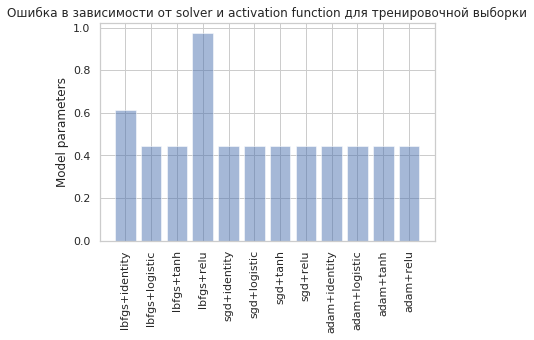

In [62]:
names = []
for opt in optimizers:
  for act in activations:
    names.append('{}+{}'.format(opt, act))
plt.bar(range(len(results_train.flatten())), results_train.flatten(), align='center', alpha=0.5)
plt.xticks(range(len(results_train.flatten())), names, rotation='vertical')
plt.ylabel('Model parameters')
plt.title('Ошибка в зависимости от solver и activation function для тренировочной выборки')

plt.show()

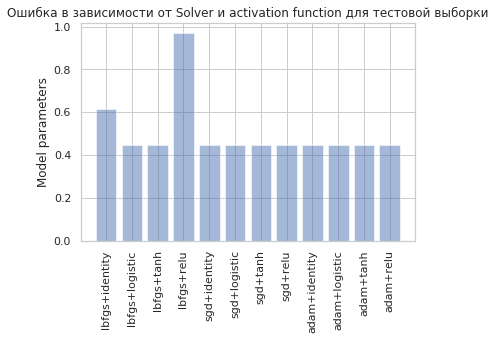

In [63]:
plt.bar(range(len(result_test.flatten())), result_test.flatten(), align='center', alpha=0.5)
plt.xticks(range(len(result_test.flatten())), names, rotation='vertical')
plt.ylabel('Model parameters')
plt.title('Ошибка в зависимости от Solver и activation function для тестовой выборки')

plt.show()

In [102]:
print('Наибольшая ошибка на тестовой выборке {} достигается при {}'.format(np.max(result_test.flatten()), names[np.argmax(result_test.flatten())]))
print('Наименьшая ошибка на тестовой выборке {} достигается при {}'.format(np.min(result_test.flatten()), names[np.argmin(result_test.flatten())]))
print('Наибольшая ошибка на тренировочной выборке {} достигается при {}'.format(np.max(results_train.flatten()), names[np.argmax(results_train.flatten())]))
print('Наименьшая ошибка на тренировочной выборке {} достигается при {}'.format(np.min(results_train.flatten()), names[np.argmin(results_train.flatten())]))

Наибольшая ошибка на тестовой выборке 0.9676660787771899 достигается при lbfgs+relu
Наименьшая ошибка на тестовой выборке 0.4462081128747795 достигается при lbfgs+logistic
Наибольшая ошибка на тренировочной выборке 0.9731716280779126 достигается при lbfgs+relu
Наименьшая ошибка на тренировочной выборке 0.4441749356854098 достигается при lbfgs+logistic


Как мы можем заметить, все классификаторы имеют похожий результат, кроме lbfgs+identity и lbfgs+relu, ошибка очень высока как на тренировочной, так и на тестовой выборках, что говорит о том, что модели с данными параметрами недообучены.

## MLP + PCA

Применим к нашим входным данным выделение главных компонент перед обучением классификатора.

In [69]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
print("До применения метода главных компонент")
mlp_model.fit(X_train, y_train)

err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test  = np.mean(y_test  != mlp_model.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
mlp_model.fit(X_2d_train, y_train)

err_2d_train = np.mean(y_train != mlp_model.predict(X_2d_train))
err_2d_test  = np.mean(y_test  != mlp_model.predict(X_2d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_2d_train))
print("Ошибка на тестовой выборке: {}".format(err_2d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.4441749356854098
Ошибка на тестовой выборке: 0.4462081128747795
После
Ошибка на тренировочной выбрке: 0.4441749356854098
Ошибка на тестовой выборке: 0.4462081128747795


Проверяем качество классификатора

Посмотрим на метрики качества после применения PCA: precision, recall, accuracy, f1-score

In [70]:
mlp_model.fit(X_2d_train, y_train)
y_pca_train = mlp_model.predict(X_2d_train)
y_pca_test = mlp_model.predict(X_2d_test)
print('Метрики для тренировочной выборки')
print(classification_report(y_train, y_pca_train))
print('\nМетрики для тестовой выборки')
print(classification_report(y_test, y_pca_test))

Метрики для тренировочной выборки
              precision    recall  f1-score   support

           0       0.56      1.00      0.71      7562
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       365
           3       0.00      0.00      0.00      1162
           4       0.00      0.00      0.00      3657
           5       0.00      0.00      0.00       802

    accuracy                           0.56     13605
   macro avg       0.09      0.17      0.12     13605
weighted avg       0.31      0.56      0.40     13605


Метрики для тестовой выборки
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1884
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00       277
           4       0.00      0.00      0.00       926
           5       0.00      0.00      0.00       188

    accuracy 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Построим матрицу рассогласования

In [0]:
cm_test = confusion_matrix(y_pca_test, y_test)
cm_train = confusion_matrix(y_pca_train, y_train)

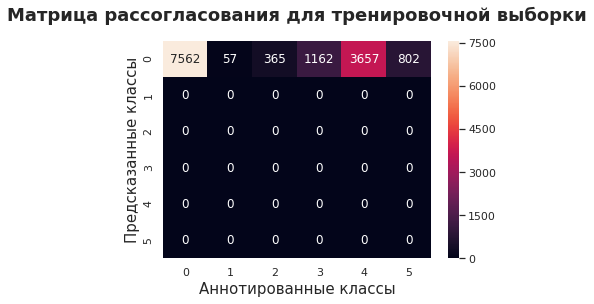

In [72]:
sns.heatmap(cm_train, annot=True, fmt="d")
plt.title('Матрица рассогласования для тренировочной выборки', fontweight='bold',fontsize=18, pad=20)
plt.xlabel('Аннотированные классы', fontsize = 15)
plt.ylabel('Предсказанные классы', fontsize = 15)
pass

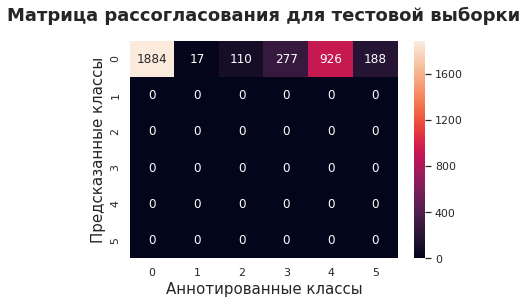

In [73]:
sns.heatmap(cm_test, annot=True, fmt="d")
plt.title('Матрица рассогласования для тестовой выборки', fontweight='bold',fontsize=18, pad=20)
plt.xlabel('Аннотированные классы', fontsize = 15)
plt.ylabel('Предсказанные классы', fontsize = 15)
pass

Посмотрим на повоедение модели в зависимости от количества главных компонент.

Наименьшая ошибка на тестовой выборке 0.4462081128747795 с 2 компонент
Наибольшая ошибка на тестовой выборке 0.4462081128747795 с 2 компонент
Наименьшая ошибка на тренировочной выборке 0.4441749356854098 с 2 компонент
Наибольшая ошибка на тренировочной выборке 0.4441749356854098 с 2 компонент


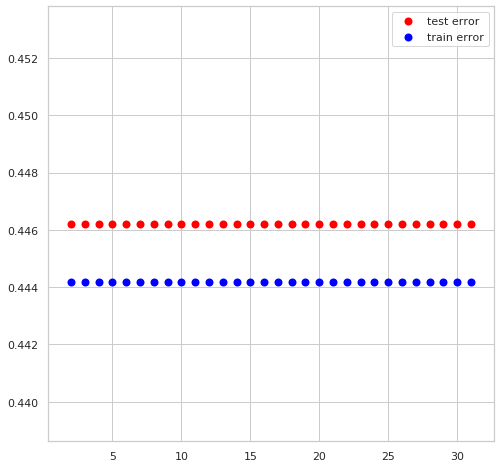

In [77]:
n_components = range(2, 32)
test_err, train_err = select_components(mlp_model)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['red', 'blue']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Наименьшая ошибка на тестовой выборке {} с {} компонент".format(test_err[best_test_result], best_test_result + 2))
print("Наибольшая ошибка на тестовой выборке {} с {} компонент".format(test_err[worst_test_result], worst_test_result + 2))
print("Наименьшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[best_train_result], best_train_result + 2))
print("Наибольшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[worst_train_result], worst_train_result + 2))

Ошибка на тестовой и тренировочной выборках осталась неизменной при разлычной количестве главных компонент.

Двуслойный классификатор

In [78]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 100),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
mlp_model.fit(X_2d_train, y_train)
print('Train error: {}'.format(1- mlp_model.score(X_2d_train, y_train)))
print('Test error: {}'.format(1 - mlp_model.score(X_2d_test, y_test)))

Train error: 0.4441749356854098
Test error: 0.44620811287477957


Ошибка на тренировочной и тестовой выборках остались неизменными.

## Подбор гиперпараметров для модели, обученной на данных с 2 главными компонентами

Error vs Alpha

In [79]:
alpha_arr = np.logspace(-3, 2, 21)
test_err, train_err = [], [] 
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 144)
    mlp_model.fit(X_2d_train, y_train)

    y_train_pred = mlp_model.predict(X_2d_train)
    y_test_pred = mlp_model.predict(X_2d_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
alpha_opt = alpha_arr[test_err == min_test_err][0]
print('Alpha optimum: {}'.format(alpha_opt))

Min train error: 0.4441749356854098
Min test error: 0.4462081128747795
Alpha optimum: 0.001


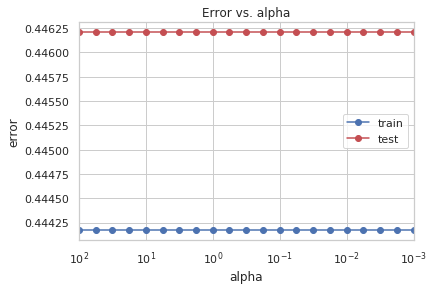

In [80]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Error vs hidden layer size

In [81]:
layer_sizes = [5, 10, 25, 50, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000]
test_err, train_err = [], [] 
for size in layer_sizes:
    mlp_model = MLPClassifier(hidden_layer_sizes = tuple([size]), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 144)
    mlp_model.fit(X_2d_train, y_train)

    y_train_pred = mlp_model.predict(X_2d_train)
    y_test_pred = mlp_model.predict(X_2d_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
opt_size_index = np.argmin(test_err)
print('size optimum: {}'.format(layer_sizes[opt_size_index]))

Min train error: 0.4441749356854098
Min test error: 0.4462081128747795
size optimum: 5


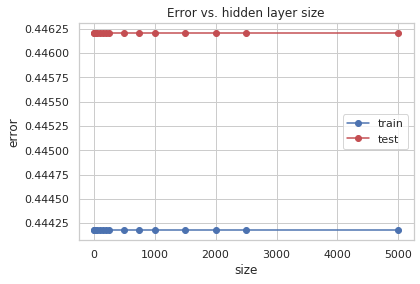

In [82]:
plt.plot(layer_sizes, train_err, 'b-o', label = 'train')
plt.plot(layer_sizes, test_err, 'r-o', label = 'test')
plt.title('Error vs. hidden layer size')
plt.xlabel('size')
plt.ylabel('error')
plt.legend()
pass

Error vs Max train iters

In [83]:
max_iters = np.arange(50, 1000, 50)
test_err, train_err = [], [] 
for max_iter in max_iters:
    mlp_model = MLPClassifier(hidden_layer_sizes = (5, ), 
                              solver = 'lbfgs', 
                              activation = 'logistic', 
                              random_state = 144,
                              max_iter=max_iter)
    mlp_model.fit(X_2d_train, y_train)

    y_train_pred = mlp_model.predict(X_2d_train)
    y_test_pred = mlp_model.predict(X_2d_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
opt_iter_index = np.argmin(test_err)
opt_iter = max_iters[opt_iter_index]
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
print('Iterations optimum: {}'.format(opt_iter))

Min train error: 0.4441749356854098
Min test error: 0.4462081128747795
Iterations optimum: 50


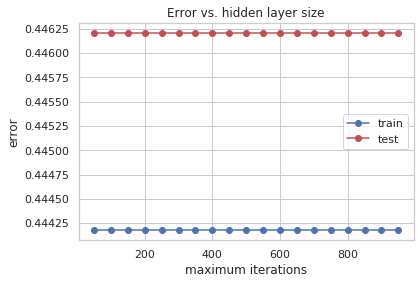

In [84]:
plt.plot(max_iters, train_err, 'b-o', label = 'train')
plt.plot(max_iters, test_err, 'r-o', label = 'test')
plt.title('Error vs. hidden layer size')
plt.xlabel('maximum iterations')
plt.ylabel('error')
plt.legend()
pass

In [85]:
optimizers = ['lbfgs', 'sgd', 'adam']
activations = ['identity', 'logistic', 'tanh', 'relu']
results_train, result_test = np.zeros((len(optimizers), len(activations))), np.zeros((len(optimizers), len(activations)))
for i, solver in enumerate(optimizers):
  for j, activation in enumerate(activations):
    mlp_model = MLPClassifier(hidden_layer_sizes = (100, ), 
                              solver = solver, 
                              activation = activation, 
                              random_state = 144, max_iter=1000000, early_stopping=True)
    mlp_model.fit(X_2d_train, y_train)

    y_train_pred = mlp_model.predict(X_2d_train)
    y_test_pred = mlp_model.predict(X_2d_test)
    results_train[i, j] = np.mean(y_train != y_train_pred)
    result_test[i, j] = np.mean(y_test != y_test_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning:

invalid value encountered in subtract



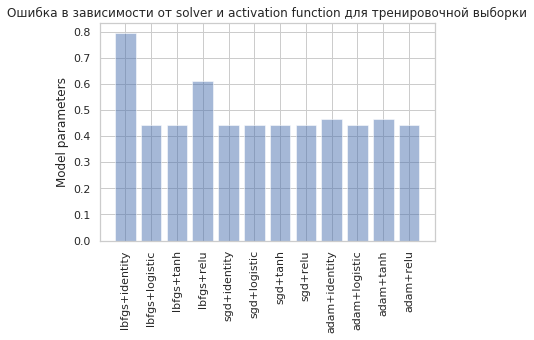

In [86]:
names = []
for opt in optimizers:
  for act in activations:
    names.append('{}+{}'.format(opt, act))
plt.bar(range(len(results_train.flatten())), results_train.flatten(), align='center', alpha=0.5)
plt.xticks(range(len(results_train.flatten())), names, rotation='vertical')
plt.ylabel('Model parameters')
plt.title('Ошибка в зависимости от solver и activation function для тренировочной выборки')

plt.show()

Результаты, полученные на тренировочной выборке сильнее колеблются в зависимости от параметров, чем до приминения PCA, но при этом лучший результат по-прежнему неизменен.

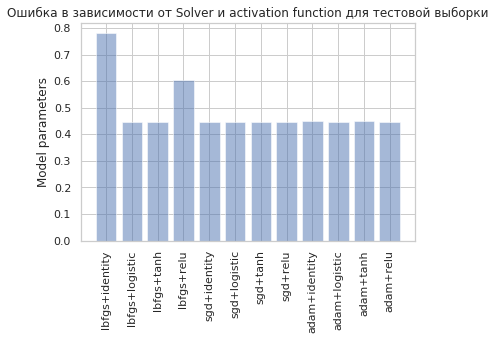

In [87]:
plt.bar(range(len(result_test.flatten())), result_test.flatten(), align='center', alpha=0.5)
plt.xticks(range(len(result_test.flatten())), names, rotation='vertical')
plt.ylabel('Model parameters')
plt.title('Ошибка в зависимости от Solver и activation function для тестовой выборки')

plt.show()

In [100]:
print('Наибольшая ошибка на тестовой выборке {} достигается при {}'.format(np.max(result_test.flatten()), names[np.argmax(result_test.flatten())]))
print('Наименьшая ошибка на тестовой выборке {} достигается при {}'.format(np.min(result_test.flatten()), names[np.argmin(result_test.flatten())]))
print('Наибольшая ошибка на тренировочной выборке {} достигается при {}'.format(np.max(results_train.flatten()), names[np.argmax(results_train.flatten())]))
print('Наименьшая ошибка на тренировочной выборке {} достигается при {}'.format(np.min(results_train.flatten()), names[np.argmin(results_train.flatten())]))

Наибольшая ошибка на тестовой выборке 0.7795414462081128 достигается при lbfgs+identity
Наименьшая ошибка на тестовой выборке 0.4462081128747795 достигается при lbfgs+logistic
Наибольшая ошибка на тренировочной выборке 0.7938257993384785 достигается при lbfgs+identity
Наименьшая ошибка на тренировочной выборке 0.4441749356854098 достигается при lbfgs+logistic


Как мы видим, подбор гиперпараметров не изменил ситуацию, мы получили точно такие же результаты для различных параметров, как и до применения PCA, однако при этом значительно уменьшилось время, затраченное на обучение т.к. мы уменьшили пространство признаков.